In [140]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [141]:
pwd = os.getcwd()
# file_path = os.path.join(pwd, os.pardir, 'data/Week1_challenge_data_source(CSV).csv')
file_path = os.path.join(pwd, os.pardir, 'data/clean_data.csv')

In [142]:
# data = pd.read_csv(file_path, na_values=["undefined"], keep_default_na=True, parse_dates=["Start", "End"])
data = pd.read_csv(file_path, parse_dates=["Start", "End"])

In [143]:
data.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (s),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,13114483460844900352.00,2019-04-04 12:01:00,770.00,2019-04-25 14:35:00,662.00,1823652.00,208201448079117.00,33664962239.00,35521209507511.00,9.16456699548519E+015,...,15854611.00,2501332.00,8198936.00,9656251.00,278082303.00,14344150.00,171744450.00,8814393.00,36749741.00,308879636.00
1,13114483482878900224.00,2019-04-09 13:04:00,235.00,2019-04-25 08:15:00,606.00,1365104.00,208201909211140.00,33681854413.00,35794009006359.00,L77566A,...,20247395.00,19111729.00,18338413.00,17227132.00,608750074.00,1170709.00,526904238.00,15055145.00,53800391.00,653384965.00
2,13114483484080500736.00,2019-04-09 17:42:00,1.00,2019-04-25 11:58:00,652.00,1361762.00,208200314458056.00,33760627129.00,35281510359387.00,D42335A,...,19725661.00,14699576.00,17587794.00,6163408.00,229584621.00,395630.00,410692588.00,4215763.00,27883638.00,279807335.00
3,13114483485442799616.00,2019-04-10 00:31:00,486.00,2019-04-25 07:36:00,171.00,1321509.00,208201402342131.00,33750343200.00,35356610164913.00,T21824A,...,21388122.00,15146643.00,13994646.00,1097942.00,799538153.00,10849722.00,749039933.00,12797283.00,43324218.00,846028530.00
4,13114483499480700928.00,2019-04-12 20:10:00,565.00,2019-04-25 10:40:00,954.00,1089009.00,208201401415120.00,33699795932.00,35407009745539.00,D88865A,...,15259380.00,18962873.00,17124581.00,415218.00,527707248.00,3529801.00,550709500.00,13910322.00,38542814.00,569138589.00


In [144]:
data.shape

(148506, 55)

In [145]:
data.columns.tolist()

['Bearer Id',
 'Start',
 'Start ms',
 'End',
 'End ms',
 'Dur. (s)',
 'IMSI',
 'MSISDN/Number',
 'IMEI',
 'Last Location Name',
 'Avg RTT DL (ms)',
 'Avg RTT UL (ms)',
 'Avg Bearer TP DL (kbps)',
 'Avg Bearer TP UL (kbps)',
 'TCP DL Retrans. Vol (Bytes)',
 'TCP UL Retrans. Vol (Bytes)',
 'DL TP < 50 Kbps (%)',
 '50 Kbps < DL TP < 250 Kbps (%)',
 '250 Kbps < DL TP < 1 Mbps (%)',
 'DL TP > 1 Mbps (%)',
 'UL TP < 10 Kbps (%)',
 '10 Kbps < UL TP < 50 Kbps (%)',
 '50 Kbps < UL TP < 300 Kbps (%)',
 'UL TP > 300 Kbps (%)',
 'HTTP DL (Bytes)',
 'HTTP UL (Bytes)',
 'Activity Duration DL (ms)',
 'Activity Duration UL (ms)',
 'Dur. (ms)',
 'Handset Manufacturer',
 'Handset Type',
 'Nb of sec with 125000B < Vol DL',
 'Nb of sec with 1250B < Vol UL < 6250B',
 'Nb of sec with 31250B < Vol DL < 125000B',
 'Nb of sec with 37500B < Vol UL',
 'Nb of sec with 6250B < Vol DL < 31250B',
 'Nb of sec with 6250B < Vol UL < 37500B',
 'Nb of sec with Vol DL < 6250B',
 'Nb of sec with Vol UL < 1250B',
 'Social M

In [146]:
data_modified = data.copy()

In [147]:
data_modified.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148506 entries, 0 to 148505
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   Bearer Id                                 148506 non-null  float64       
 1   Start                                     148506 non-null  datetime64[ns]
 2   Start ms                                  148506 non-null  float64       
 3   End                                       148506 non-null  datetime64[ns]
 4   End ms                                    148506 non-null  float64       
 5   Dur. (s)                                  148506 non-null  float64       
 6   IMSI                                      148506 non-null  float64       
 7   MSISDN/Number                             148506 non-null  float64       
 8   IMEI                                      148506 non-null  float64       
 9   Last Location N

In [17]:
# sets global styling for graphs
plt.style.use('seaborn')

### Top 10 used handsets by customers

In [18]:
top_10_handsets = data_modified["Handset Type"].value_counts().nlargest(10)

In [19]:
top_10_handsets

Huawei B528S-23A                19752
Apple iPhone 6S (A1688)          9401
Apple iPhone 6 (A1586)           9004
Unknown                          8971
Apple iPhone 7 (A1778)           6301
Apple iPhone Se (A1723)          5176
Apple iPhone 8 (A1905)           4985
Apple iPhone Xr (A2105)          4562
Samsung Galaxy S8 (Sm-G950F)     4504
Apple iPhone X (A1901)           3809
Name: Handset Type, dtype: int64

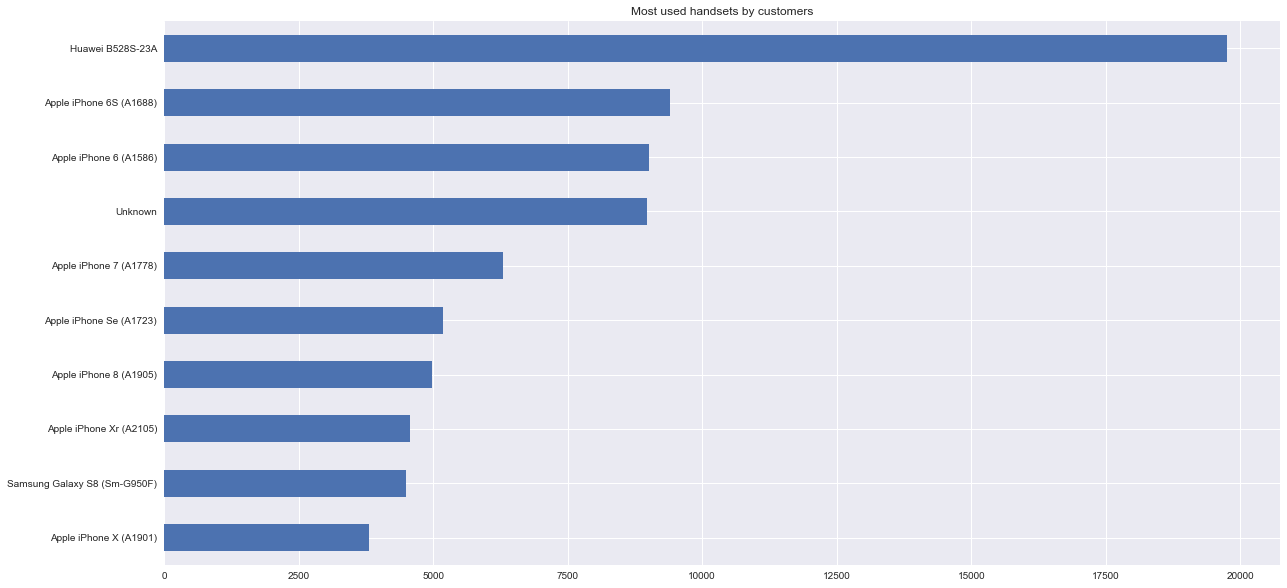

In [20]:
top_10_handsets.plot(kind="barh", figsize=(20, 10), title="Most used handsets by customers").invert_yaxis()

### Top 3 handset manufacturers

In [62]:
top_3_handset_manufacturers = data_modified["Handset Manufacturer"].value_counts().nlargest(3)

In [63]:
top_3_handset_manufacturers

Apple      59339
Samsung    40429
Huawei     34296
Name: Handset Manufacturer, dtype: int64

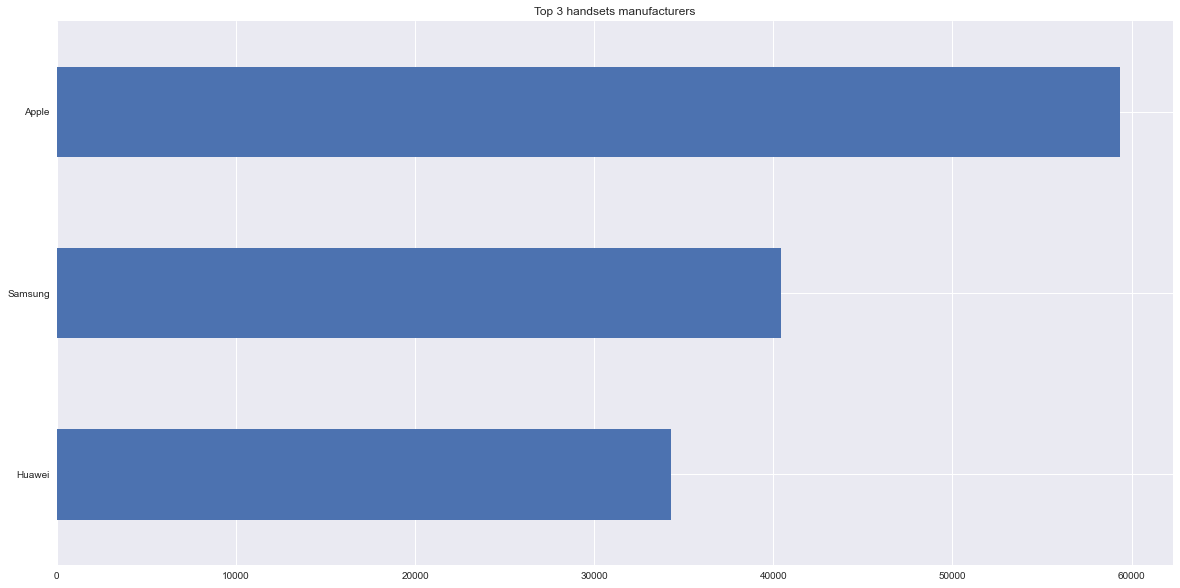

In [64]:
top_3_handset_manufacturers.plot(kind="barh", figsize=(20, 10), title="Top 3 handsets manufacturers").invert_yaxis()

### Top 5 Handsets Manufactured by Apple

In [65]:
top_5_apple_handsets = data_modified[data_modified["Handset Manufacturer"] == "Apple"][["Handset Manufacturer", "Handset Type"]].groupby("Handset Type").count().nlargest(n=5, columns="Handset Manufacturer")

In [66]:
top_5_apple_handsets

,Handset Manufacturer
Handset Type,
Apple iPhone 6S (A1688),9395
Apple iPhone 6 (A1586),8993
Apple iPhone 7 (A1778),6279
Apple iPhone Se (A1723),5165
Apple iPhone 8 (A1905),4977


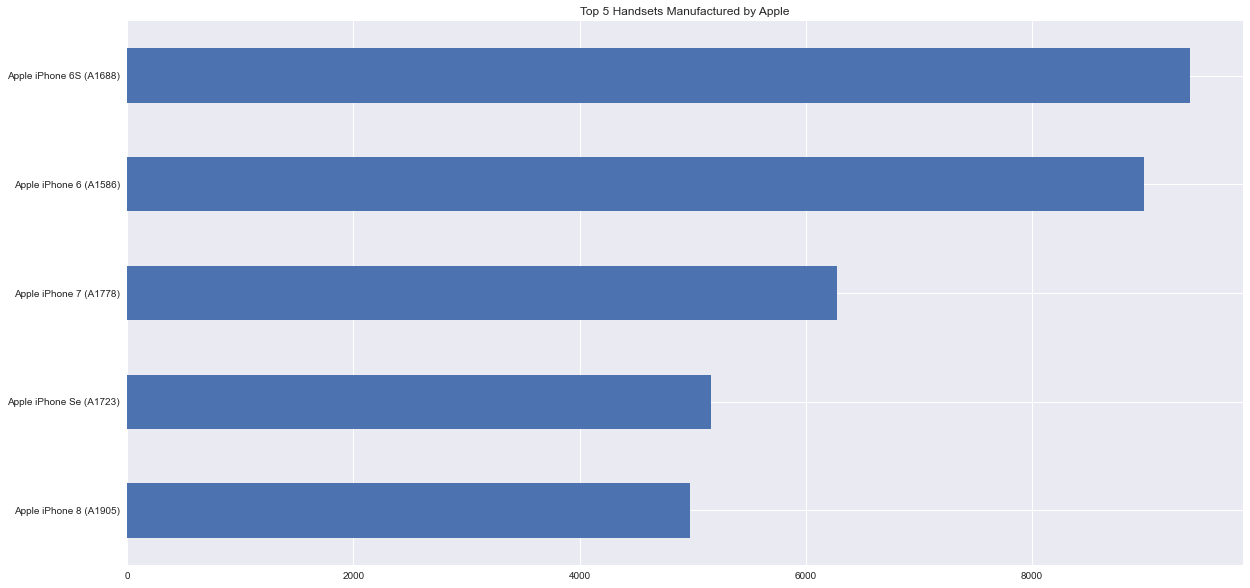

In [67]:
top_5_apple_handsets.plot(kind="barh", figsize=(20, 10), title="Top 5 Handsets Manufactured by Apple", legend=False, xlabel="").invert_yaxis()

### Top 5 Handsets Manufactured by Samsung

In [68]:
top_5_samsung_handsets = data_modified[data_modified["Handset Manufacturer"] == "Samsung"][["Handset Manufacturer", "Handset Type"]].groupby("Handset Type").count().nlargest(n=5, columns="Handset Manufacturer")

In [108]:
top_5_samsung_handsets

,Handset Manufacturer
Handset Type,
Samsung Galaxy S8 (Sm-G950F),4464
Samsung Galaxy A5 Sm-A520F,3700
Samsung Galaxy J5 (Sm-J530),3675
Samsung Galaxy J3 (Sm-J330),3456
Samsung Galaxy S7 (Sm-G930X),3171


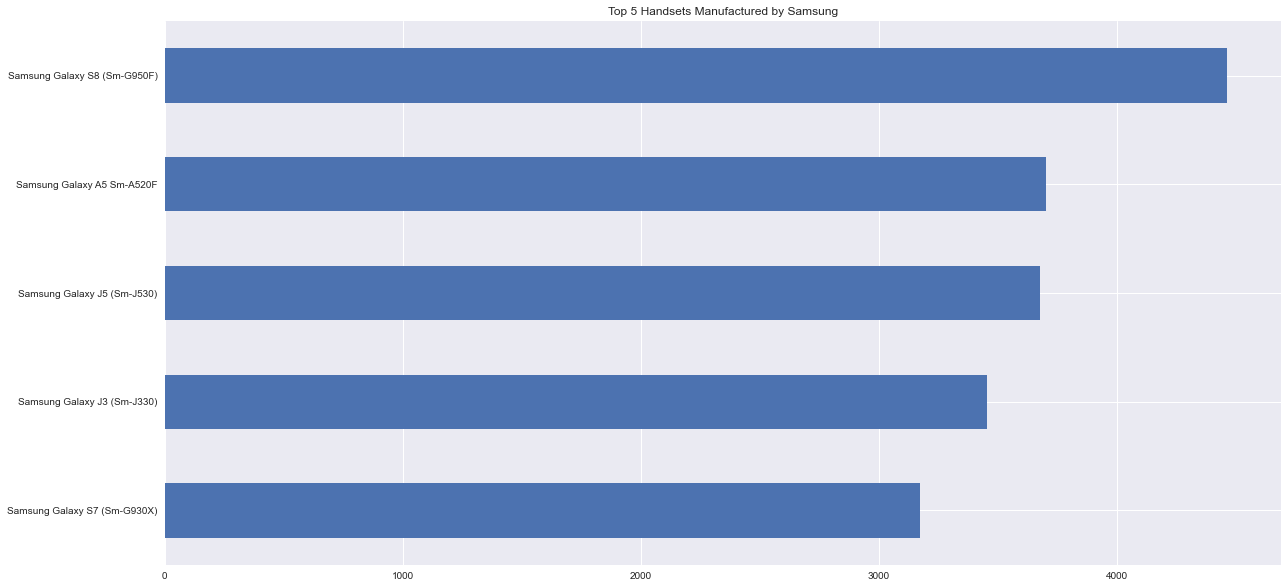

In [69]:
top_5_samsung_handsets.plot(kind="barh", figsize=(20, 10), title="Top 5 Handsets Manufactured by Samsung", legend=False, xlabel="").invert_yaxis()

### Top 5 Handsets Manufactured by Huawei

In [70]:
top_5_huawei_handsets = data_modified[data_modified["Handset Manufacturer"] == "Huawei"][["Handset Manufacturer", "Handset Type"]].groupby("Handset Type").count().nlargest(n=5, columns="Handset Manufacturer")

In [109]:
top_5_huawei_handsets

,Handset Manufacturer
Handset Type,
Huawei B528S-23A,19727
Huawei E5180,2074
Huawei P20 Lite Huawei Nova 3E,2012
Huawei P20,1475
Huawei Y6 2018,996


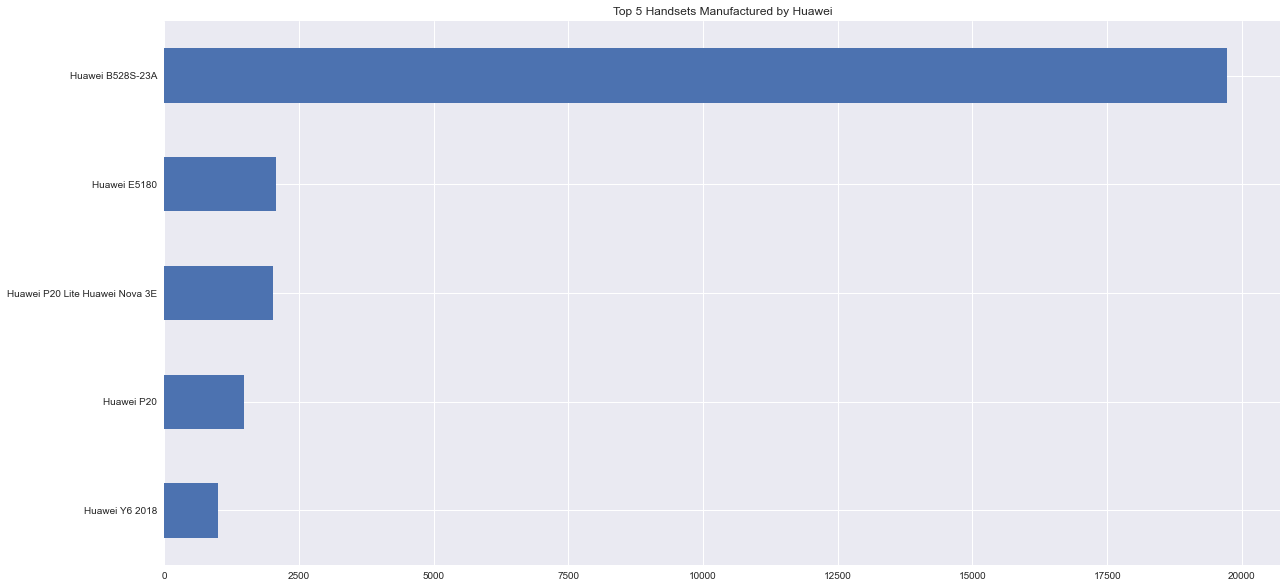

In [71]:
top_5_huawei_handsets.plot(kind="barh", figsize=(20, 10), title="Top 5 Handsets Manufactured by Huawei", legend=False, xlabel="").invert_yaxis()

In [118]:
# to convert the scientific notation to decimal format
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [73]:
# reset the decimal format back to scientific notation
# pd.reset_option('display.float_format')

### Grouping values to look into sessions per user
---

In [148]:
data_modified.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (s),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,13114483460844900352.00,2019-04-04 12:01:00,770.00,2019-04-25 14:35:00,662.00,1823652.00,208201448079117.00,33664962239.00,35521209507511.00,9.16456699548519E+015,...,15854611.00,2501332.00,8198936.00,9656251.00,278082303.00,14344150.00,171744450.00,8814393.00,36749741.00,308879636.00
1,13114483482878900224.00,2019-04-09 13:04:00,235.00,2019-04-25 08:15:00,606.00,1365104.00,208201909211140.00,33681854413.00,35794009006359.00,L77566A,...,20247395.00,19111729.00,18338413.00,17227132.00,608750074.00,1170709.00,526904238.00,15055145.00,53800391.00,653384965.00
2,13114483484080500736.00,2019-04-09 17:42:00,1.00,2019-04-25 11:58:00,652.00,1361762.00,208200314458056.00,33760627129.00,35281510359387.00,D42335A,...,19725661.00,14699576.00,17587794.00,6163408.00,229584621.00,395630.00,410692588.00,4215763.00,27883638.00,279807335.00
3,13114483485442799616.00,2019-04-10 00:31:00,486.00,2019-04-25 07:36:00,171.00,1321509.00,208201402342131.00,33750343200.00,35356610164913.00,T21824A,...,21388122.00,15146643.00,13994646.00,1097942.00,799538153.00,10849722.00,749039933.00,12797283.00,43324218.00,846028530.00
4,13114483499480700928.00,2019-04-12 20:10:00,565.00,2019-04-25 10:40:00,954.00,1089009.00,208201401415120.00,33699795932.00,35407009745539.00,D88865A,...,15259380.00,18962873.00,17124581.00,415218.00,527707248.00,3529801.00,550709500.00,13910322.00,38542814.00,569138589.00


In [149]:
user_agg = data_modified.groupby(["MSISDN/Number"], as_index=False).agg({'Bearer Id':'count', "Dur. (s)": "sum", "Total UL (Bytes)": "sum", "Total DL (Bytes)": "sum",  "Social Media UL (Bytes)": "sum", "Social Media DL (Bytes)": "sum", "Google UL (Bytes)": "sum", "Google DL (Bytes)": "sum", "Email UL (Bytes)": "sum", "Email DL (Bytes)": "sum", "Youtube UL (Bytes)": "sum", "Youtube DL (Bytes)": "sum", "Netflix UL (Bytes)": "sum", "Netflix DL (Bytes)": "sum", "Gaming UL (Bytes)": "sum", "Gaming DL (Bytes)": "sum", "Other UL (Bytes)": "sum", "Other DL (Bytes)": "sum"})

In [150]:
user_agg.reset_index(drop=True, inplace=True)

In [155]:
# change column to string to avoid numerical calculations
user_agg["MSISDN/Number"] = user_agg["MSISDN/Number"].astype(str)

In [158]:
user_agg.shape

(106471, 19)

In [159]:
user_agg.rename(columns={"Bearer Id": "Session Count"}, inplace=True)

In [160]:
user_agg["Total Data Transferred"] = user_agg["Total UL (Bytes)"] + user_agg["Total DL (Bytes)"]

In [161]:
user_agg["Google Volume (Bytes)"] = user_agg["Google UL (Bytes)"] + user_agg["Google DL (Bytes)"]
user_agg["Netflix Volume (Bytes)"] = user_agg["Netflix UL (Bytes)"] + user_agg["Netflix DL (Bytes)"]
user_agg["Youtube Volume (Bytes)"] = user_agg["Youtube UL (Bytes)"] + user_agg["Youtube DL (Bytes)"]
user_agg["Gaming Volume (Bytes)"] = user_agg["Gaming UL (Bytes)"] + user_agg["Gaming DL (Bytes)"]
user_agg["Email Volume (Bytes)"] = user_agg["Email UL (Bytes)"] + user_agg["Email DL (Bytes)"]
user_agg["Social Media Volume (Bytes)"] = user_agg["Social Media UL (Bytes)"] + user_agg["Social Media DL (Bytes)"]
user_agg["Other Volume (Bytes)"] = user_agg["Other UL (Bytes)"] + user_agg["Other DL (Bytes)"]

In [162]:
# user_agg["Total Volume (Bytes)"] = user_agg["Google Volume (Bytes)"] + user_agg["Netflix Volume (Bytes)"] + user_agg["Youtube Volume (Bytes)"] + user_agg["Gaming Volume (Bytes)"] + user_agg["Other Volume (Bytes)"] + user_agg["Social Media Volume (Bytes)"] + user_agg["Email Volume (Bytes)"]

In [163]:
user_agg.shape

(106471, 27)

In [164]:
user_agg.head()

,MSISDN/Number,Session Count,Dur. (s),Total UL (Bytes),Total DL (Bytes),Social Media UL (Bytes),Social Media DL (Bytes),Google UL (Bytes),Google DL (Bytes),Email UL (Bytes),...,Other UL (Bytes),Other DL (Bytes),Total Data Transferred,Google Volume (Bytes),Netflix Volume (Bytes),Youtube Volume (Bytes),Gaming Volume (Bytes),Email Volume (Bytes),Social Media Volume (Bytes),Other Volume (Bytes)
0,33601001722.0,1,116720.00,36053108.00,842637466.00,25631.00,2206504.00,1051882.00,3337123.00,493962.00,...,9473882.00,377096990.00,878690574.00,4389005.00,27180981.00,21624548.00,812458661.00,1331362.00,2232135.00,386570872.00
1,33601001754.0,1,181230.00,36104459.00,120755184.00,62017.00,2598548.00,1137166.00,4197697.00,478960.00,...,2152370.00,279557701.00,156859643.00,5334863.00,11221763.00,12432223.00,119750078.00,3307781.00,2660565.00,281710071.00
2,33601002511.0,1,134969.00,39306820.00,556659663.00,47619.00,3148004.00,99643.00,3343483.00,768880.00,...,6607171.00,495086501.00,595966483.00,3443126.00,19353900.00,21333570.00,538827713.00,3205380.00,3195623.00,501693672.00
3,33601007832.0,1,49878.00,20327526.00,401993172.00,28825.00,251469.00,3740728.00,5937765.00,106052.00,...,10031701.00,25248001.00,422320698.00,9678493.00,1942092.00,6977321.00,391126127.00,2284670.00,280294.00,35279702.00
4,33601008617.0,2,37104.00,94280527.00,1363130417.00,51312.00,2861230.00,4770948.00,13728668.00,1057661.00,...,27160771.00,777643713.00,1457410944.00,18499616.00,49201724.00,41533002.00,1314797820.00,3305469.00,2912542.00,804804484.00


In [165]:
volume_per_user = user_agg.drop(columns=[
    "Total UL (Bytes)",
    "Total DL (Bytes)",
    "Social Media UL (Bytes)",
    "Social Media DL (Bytes)",
    "Google UL (Bytes)",
    "Google DL (Bytes)",
    "Email UL (Bytes)",
    "Email DL (Bytes)",
    "Youtube UL (Bytes)",
    "Youtube DL (Bytes)",
    "Netflix UL (Bytes)",
    "Netflix DL (Bytes)",
    "Gaming UL (Bytes)",
    "Gaming DL (Bytes)",
    "Other UL (Bytes)",
    "Other DL (Bytes)"
])

In [166]:
volume_per_user.shape

(106471, 11)

In [167]:
volume_per_user.head()

,MSISDN/Number,Session Count,Dur. (s),Total Data Transferred,Google Volume (Bytes),Netflix Volume (Bytes),Youtube Volume (Bytes),Gaming Volume (Bytes),Email Volume (Bytes),Social Media Volume (Bytes),Other Volume (Bytes)
0,33601001722.0,1,116720.00,878690574.00,4389005.00,27180981.00,21624548.00,812458661.00,1331362.00,2232135.00,386570872.00
1,33601001754.0,1,181230.00,156859643.00,5334863.00,11221763.00,12432223.00,119750078.00,3307781.00,2660565.00,281710071.00
2,33601002511.0,1,134969.00,595966483.00,3443126.00,19353900.00,21333570.00,538827713.00,3205380.00,3195623.00,501693672.00
3,33601007832.0,1,49878.00,422320698.00,9678493.00,1942092.00,6977321.00,391126127.00,2284670.00,280294.00,35279702.00
4,33601008617.0,2,37104.00,1457410944.00,18499616.00,49201724.00,41533002.00,1314797820.00,3305469.00,2912542.00,804804484.00


### Non graphical Univariate analysis
---

In [168]:
volume_per_user.columns.tolist()

['MSISDN/Number',
 'Session Count',
 'Dur. (s)',
 'Total Data Transferred',
 'Google Volume (Bytes)',
 'Netflix Volume (Bytes)',
 'Youtube Volume (Bytes)',
 'Gaming Volume (Bytes)',
 'Email Volume (Bytes)',
 'Social Media Volume (Bytes)',
 'Other Volume (Bytes)']

In [169]:
volume_per_user["Session Count"].describe()

count   106471.00
mean         1.39
std          0.81
min          1.00
25%          1.00
50%          1.00
75%          2.00
max         18.00
Name: Session Count, dtype: float64

In [98]:
volume_per_user["Dur. (s)"].describe()

count     106471.00
mean      146571.49
std       186562.67
min         7142.00
25%        72399.50
50%       103137.00
75%       172799.00
max     18553754.00
Name: Dur. (s), dtype: float64

In [99]:
volume_per_user["Total Data Transferred"].describe()

count       106471.00
mean     691519853.42
std      491526652.87
min       33249009.00
25%      358765225.00
50%      618326893.00
75%      857873157.50
max     8846226494.00
Name: Total Data Transferred, dtype: float64

In [100]:
volume_per_user["Google Volume (Bytes)"].describe()

count      106471.00
mean     10890704.39
std       7552384.40
min         40330.00
25%       5945631.50
50%       9592577.00
75%      13223179.50
max     152191852.00
Name: Google Volume (Bytes), dtype: float64

In [101]:
volume_per_user["Netflix Volume (Bytes)"].describe()

count      106471.00
mean     31563183.13
std      21309392.94
min        184569.00
25%      18570109.00
50%      26731157.00
75%      38002332.00
max     399519079.00
Name: Netflix Volume (Bytes), dtype: float64

In [102]:
volume_per_user["Youtube Volume (Bytes)"].describe()

count      106471.00
mean     31581722.91
std      21315507.21
min         78903.00
25%      18636632.50
50%      26816330.00
75%      37956655.00
max     452958769.00
Name: Youtube Volume (Bytes), dtype: float64

In [103]:
volume_per_user["Email Volume (Bytes)"].describe()

count     106471.00
mean     3151120.96
std      2224562.52
min        18176.00
25%      1675398.00
50%      2801129.00
75%      3848998.00
max     42418782.00
Name: Email Volume (Bytes), dtype: float64

In [104]:
volume_per_user["Gaming Volume (Bytes)"].describe()

count       106471.00
mean     600258518.58
std      449561110.91
min         306358.00
25%      288249263.00
50%      542677264.00
75%      777704466.50
max     7749432234.00
Name: Gaming Volume (Bytes), dtype: float64

In [105]:
volume_per_user["Social Media Volume (Bytes)"].describe()

count     106471.00
mean     2549791.01
std      1909684.87
min         1563.00
25%      1211936.00
50%      2305229.00
75%      3309043.00
max     43374779.00
Name: Social Media Volume (Bytes), dtype: float64

In [106]:
volume_per_user["Other Volume (Bytes)"].describe()

count       106471.00
mean     598949256.85
std      449288975.90
min         149045.00
25%      285874681.00
50%      540109665.00
75%      775646602.50
max     8167877776.00
Name: Other Volume (Bytes), dtype: float64

In [170]:
# volume_per_user["Total Volume (Bytes)"].describe()

In [171]:
volume_per_user.describe()

,Session Count,Dur. (s),Total Data Transferred,Google Volume (Bytes),Netflix Volume (Bytes),Youtube Volume (Bytes),Gaming Volume (Bytes),Email Volume (Bytes),Social Media Volume (Bytes),Other Volume (Bytes)
count,106471.00,106471.00,106471.00,106471.00,106471.00,106471.00,106471.00,106471.00,106471.00,106471.00
mean,1.39,146571.49,691519853.42,10890704.39,31563183.13,31581722.91,600258518.58,3151120.96,2549791.01,598949256.85
std,0.81,186562.67,491526652.87,7552384.40,21309392.94,21315507.21,449561110.91,2224562.52,1909684.87,449288975.90
min,1.00,7142.00,33249009.00,40330.00,184569.00,78903.00,306358.00,18176.00,1563.00,149045.00
25%,1.00,72399.50,358765225.00,5945631.50,18570109.00,18636632.50,288249263.00,1675398.00,1211936.00,285874681.00
50%,1.00,103137.00,618326893.00,9592577.00,26731157.00,26816330.00,542677264.00,2801129.00,2305229.00,540109665.00
75%,2.00,172799.00,857873157.50,13223179.50,38002332.00,37956655.00,777704466.50,3848998.00,3309043.00,775646602.50
max,18.00,18553754.00,8846226494.00,152191852.00,399519079.00,452958769.00,7749432234.00,42418782.00,43374779.00,8167877776.00


### Graphical Univariate analysis
---

<AxesSubplot:>

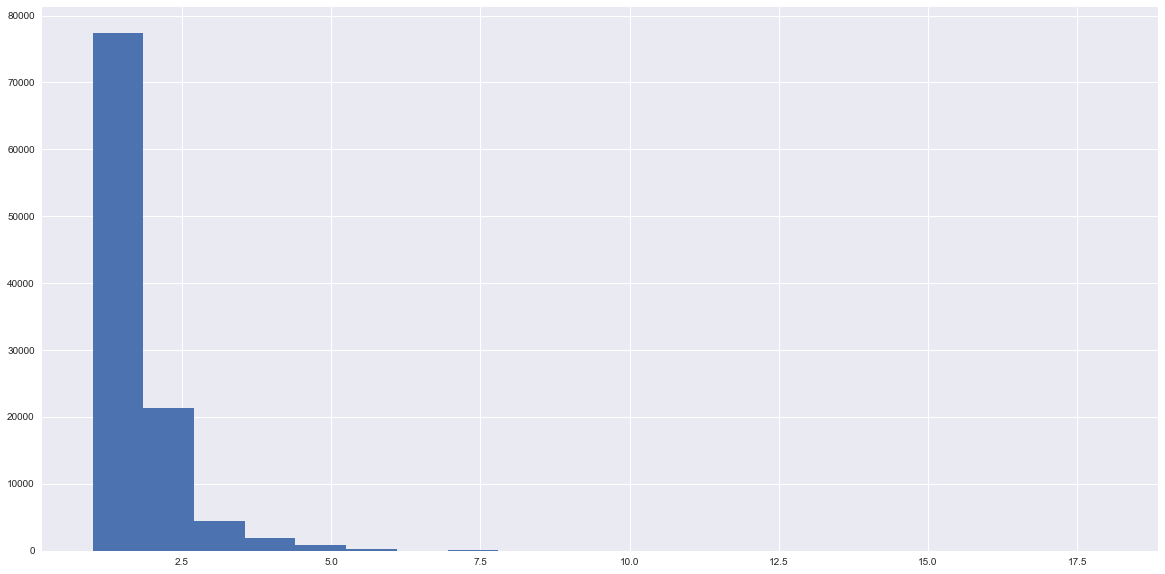

In [172]:
volume_per_user["Session Count"].hist(bins=20, figsize=(20, 10))

<AxesSubplot:>

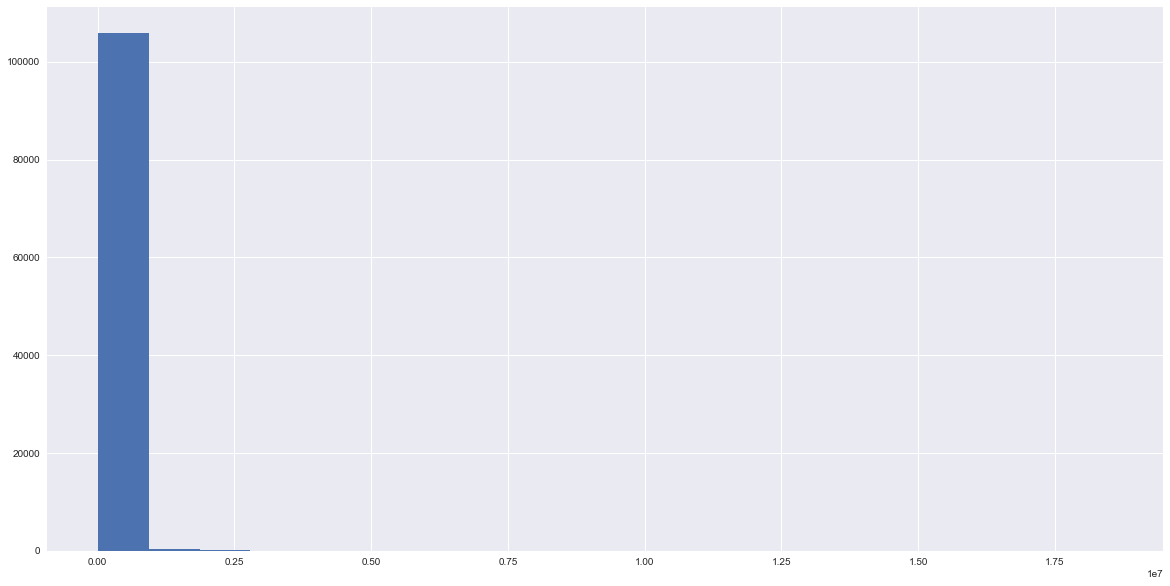

In [173]:
volume_per_user["Dur. (s)"].hist(bins=20, figsize=(20, 10))

<AxesSubplot:>

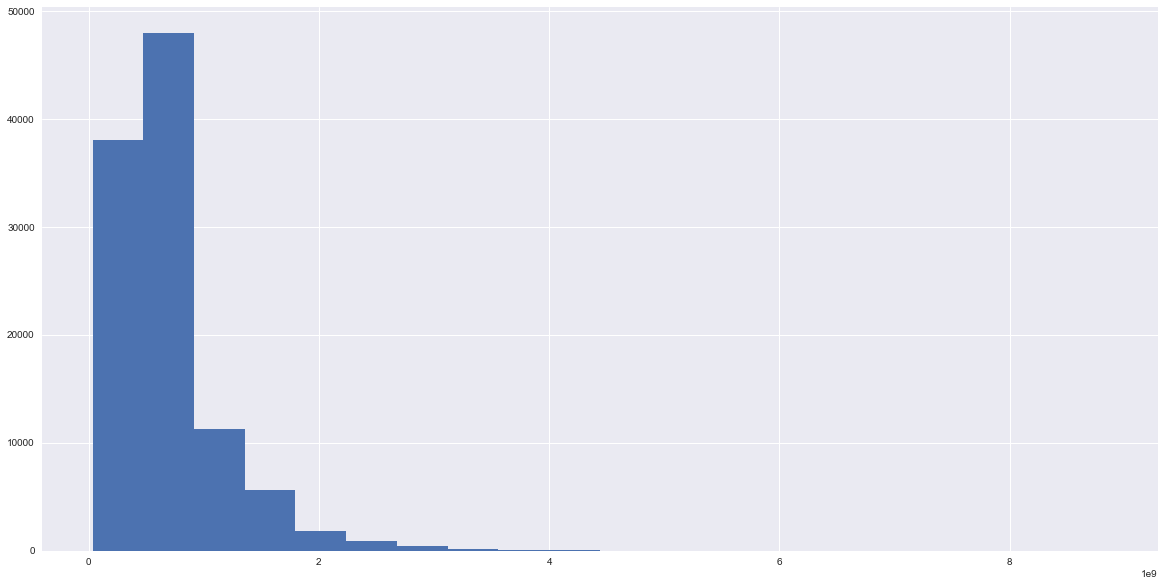

In [ ]:
volume_per_user["Total Data Transferred"].hist(bins=20, figsize=(20, 10))

<AxesSubplot:>

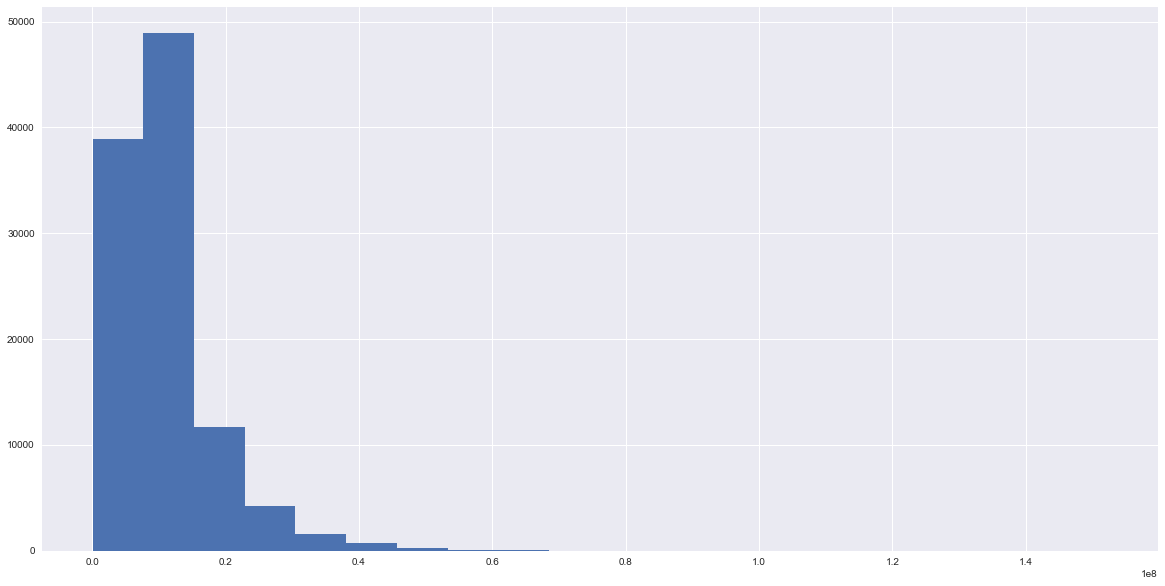

In [ ]:
volume_per_user["Google Volume (Bytes)"].hist(bins=20, figsize=(20, 10))

<AxesSubplot:>

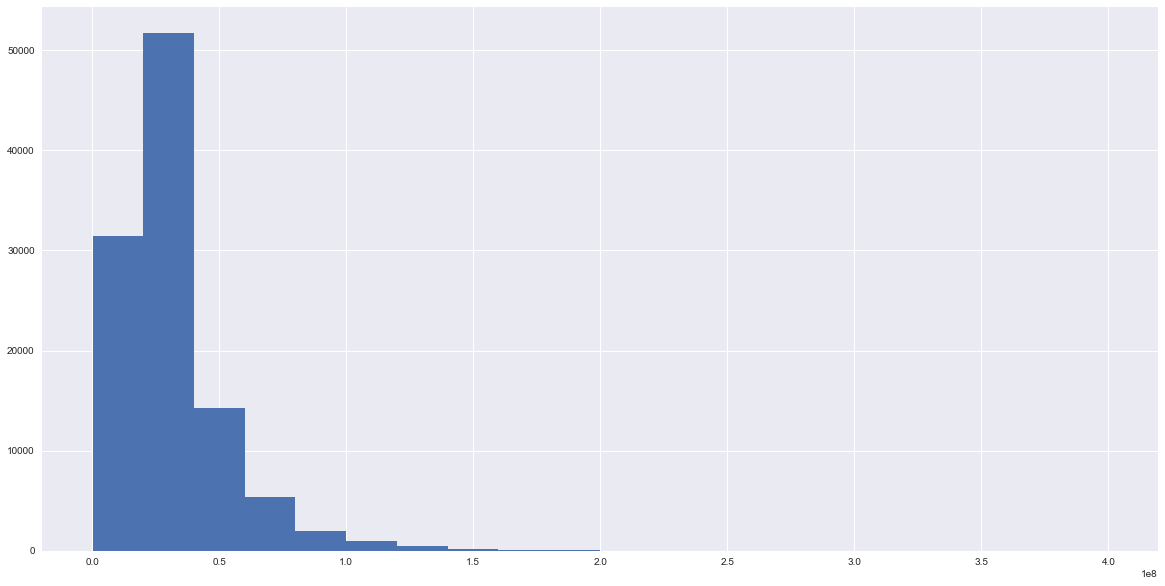

In [ ]:
volume_per_user["Netflix Volume (Bytes)"].hist(bins=20, figsize=(20, 10))

<AxesSubplot:>

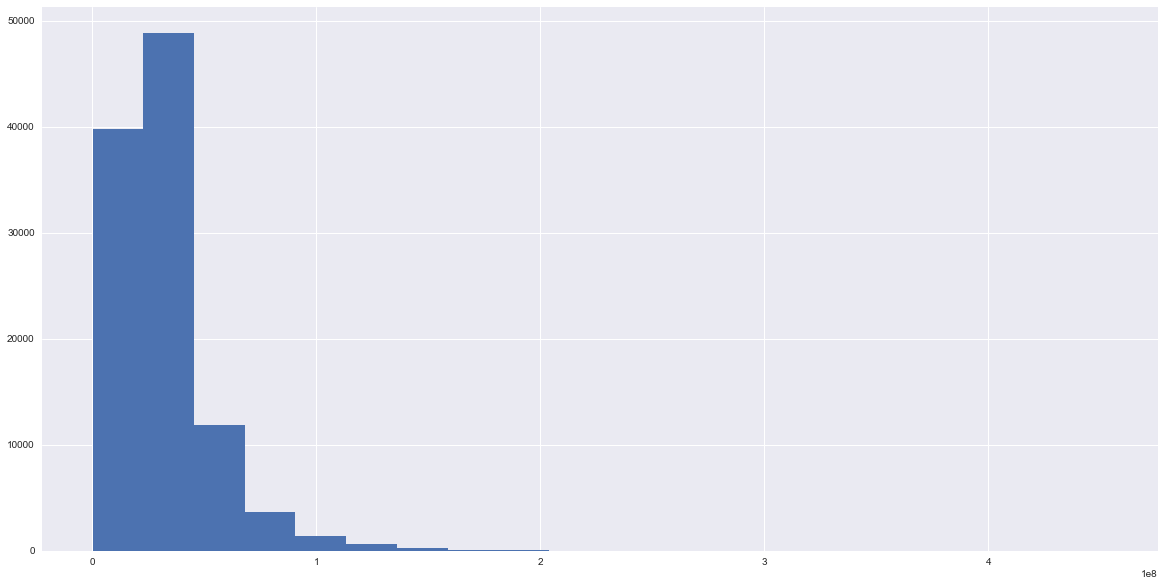

In [ ]:
volume_per_user["Youtube Volume (Bytes)"].hist(bins=20, figsize=(20, 10))

<AxesSubplot:>

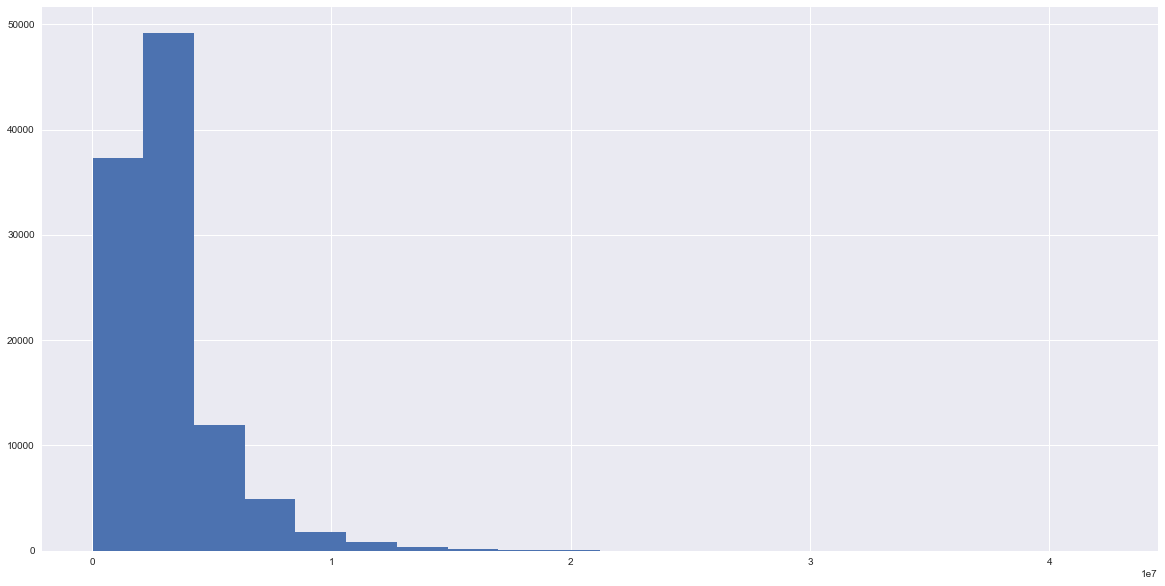

In [ ]:
volume_per_user["Email Volume (Bytes)"].hist(bins=20, figsize=(20, 10))

<AxesSubplot:>

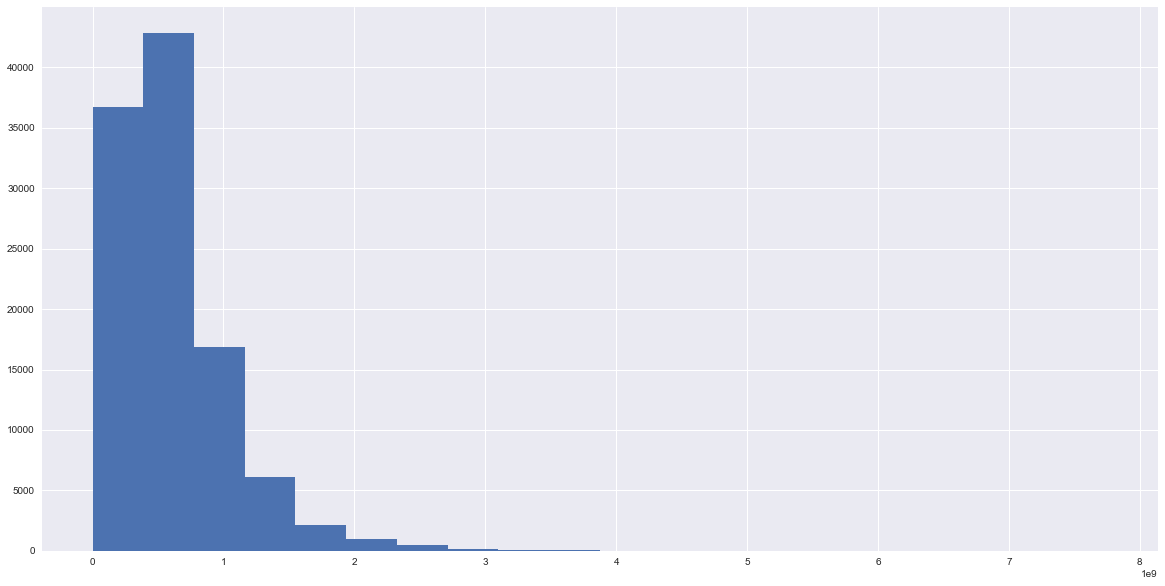

In [ ]:
volume_per_user["Gaming Volume (Bytes)"].hist(bins=20, figsize=(20, 10))

<AxesSubplot:>

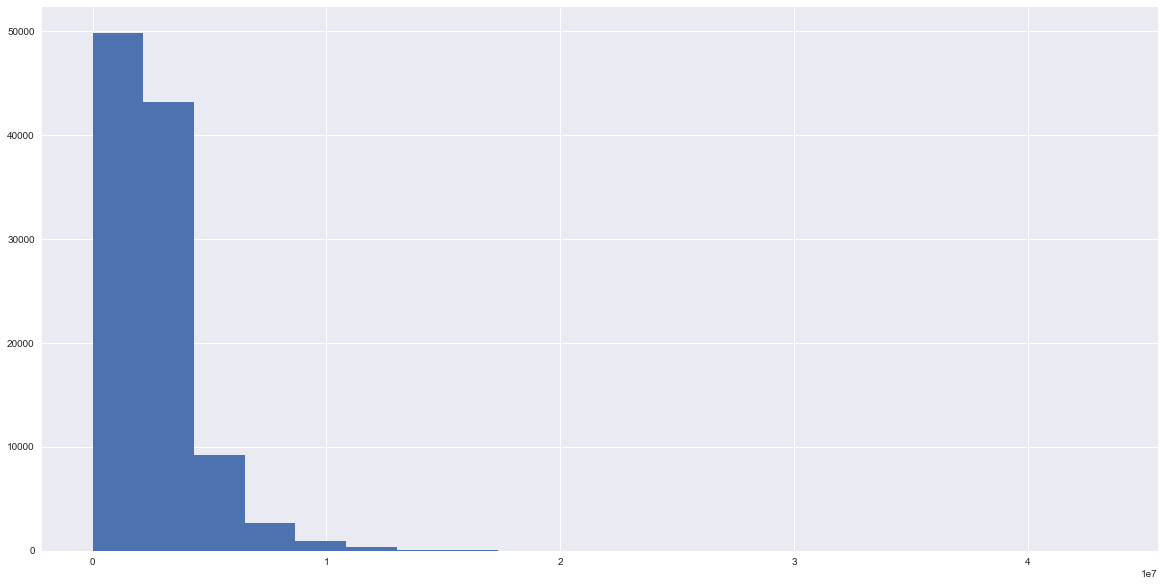

In [ ]:
volume_per_user["Social Media Volume (Bytes)"].hist(bins=20, figsize=(20, 10))

<AxesSubplot:>

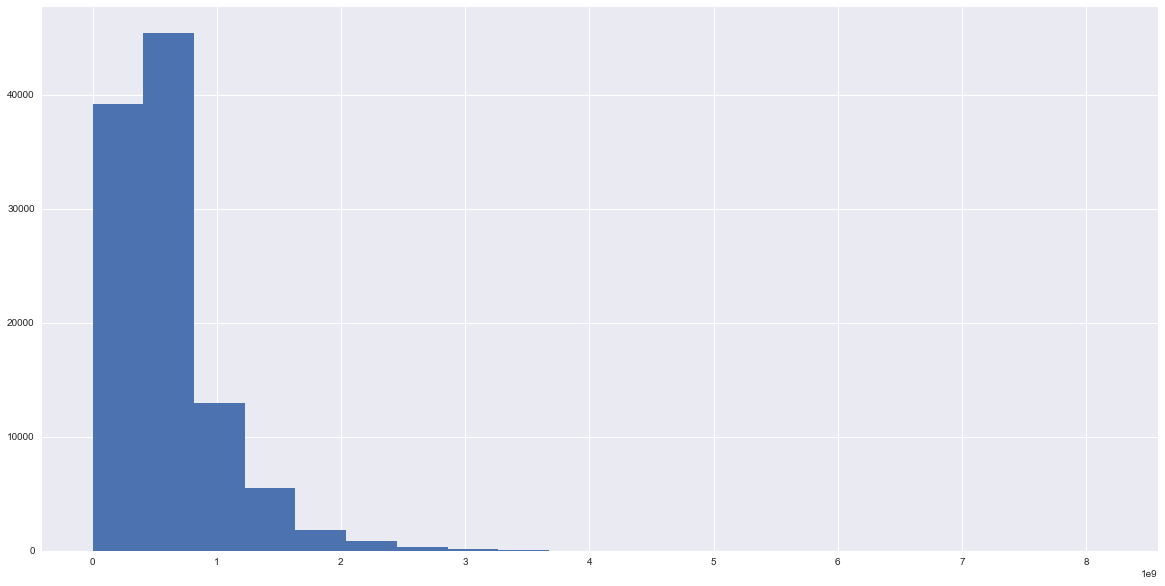

In [ ]:
volume_per_user["Other Volume (Bytes)"].hist(bins=20, figsize=(20, 10))

<AxesSubplot:>

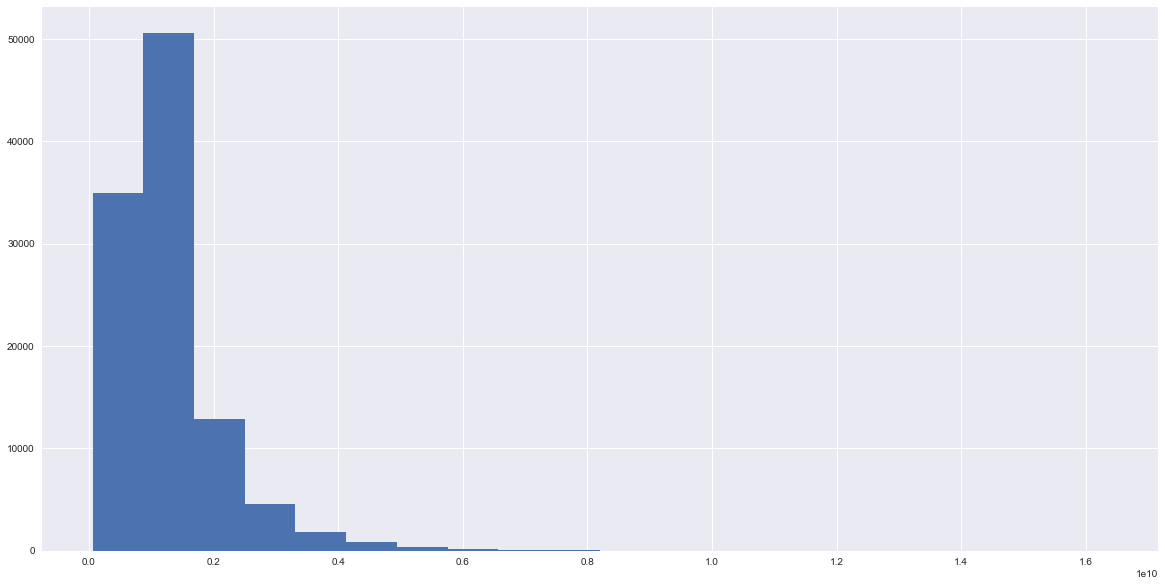

In [ ]:
volume_per_user["Total Volume (Bytes)"].hist(bins=20, figsize=(20, 10))

array([[<AxesSubplot:title={'center':'Session Count'}>,
        <AxesSubplot:title={'center':'Dur. (s)'}>,
        <AxesSubplot:title={'center':'Total Data Transferred'}>],
       [<AxesSubplot:title={'center':'Google Volume (Bytes)'}>,
        <AxesSubplot:title={'center':'Netflix Volume (Bytes)'}>,
        <AxesSubplot:title={'center':'Youtube Volume (Bytes)'}>],
       [<AxesSubplot:title={'center':'Gaming Volume (Bytes)'}>,
        <AxesSubplot:title={'center':'Email Volume (Bytes)'}>,
        <AxesSubplot:title={'center':'Social Media Volume (Bytes)'}>],
       [<AxesSubplot:title={'center':'Other Volume (Bytes)'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

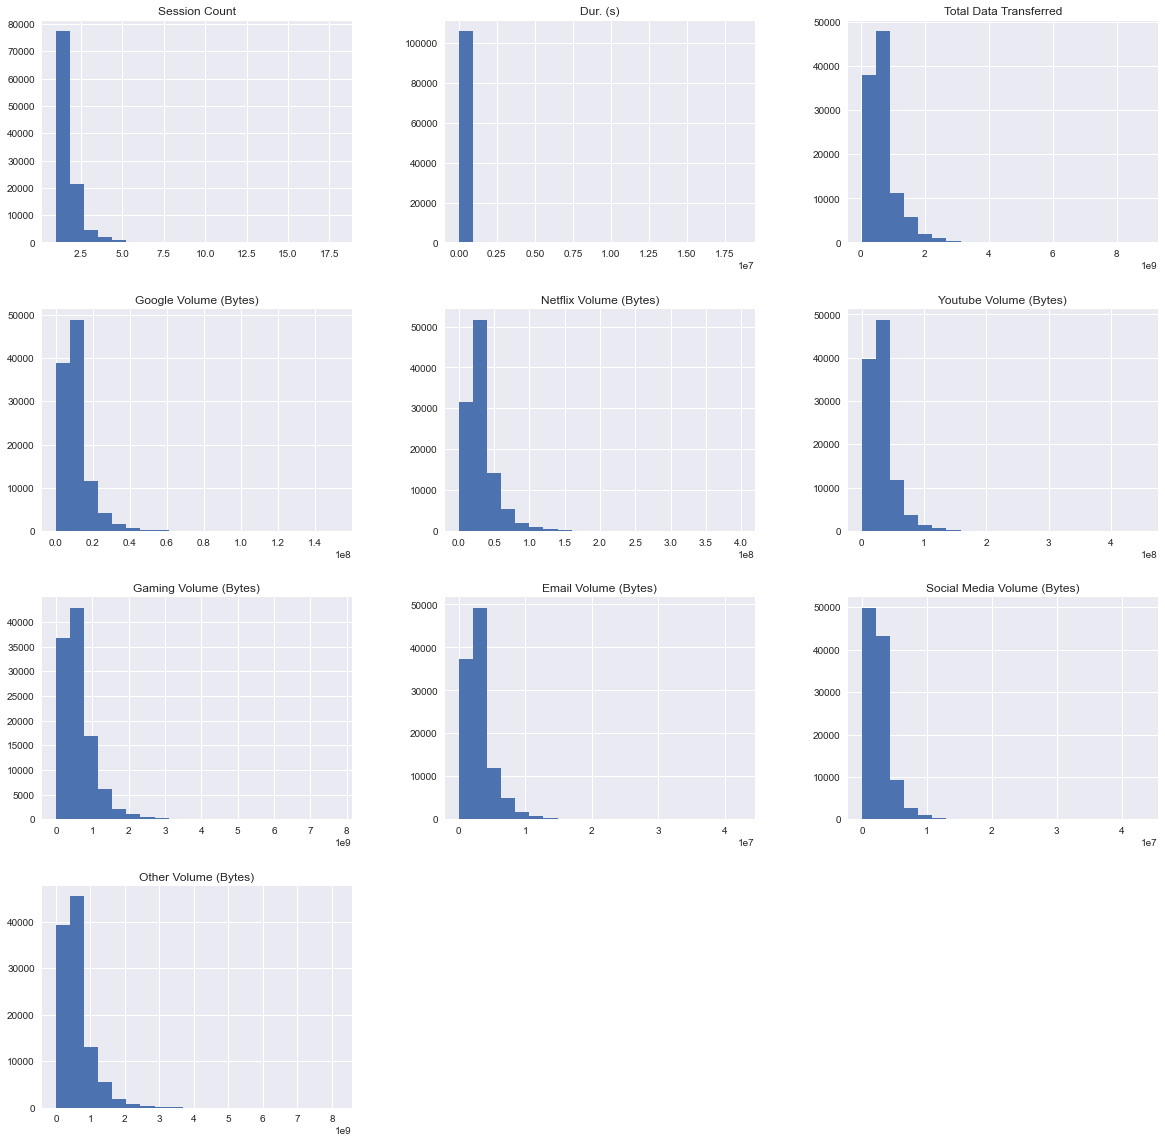

In [174]:
volume_per_user.hist(bins=20, figsize=(20, 20))

<AxesSubplot:>

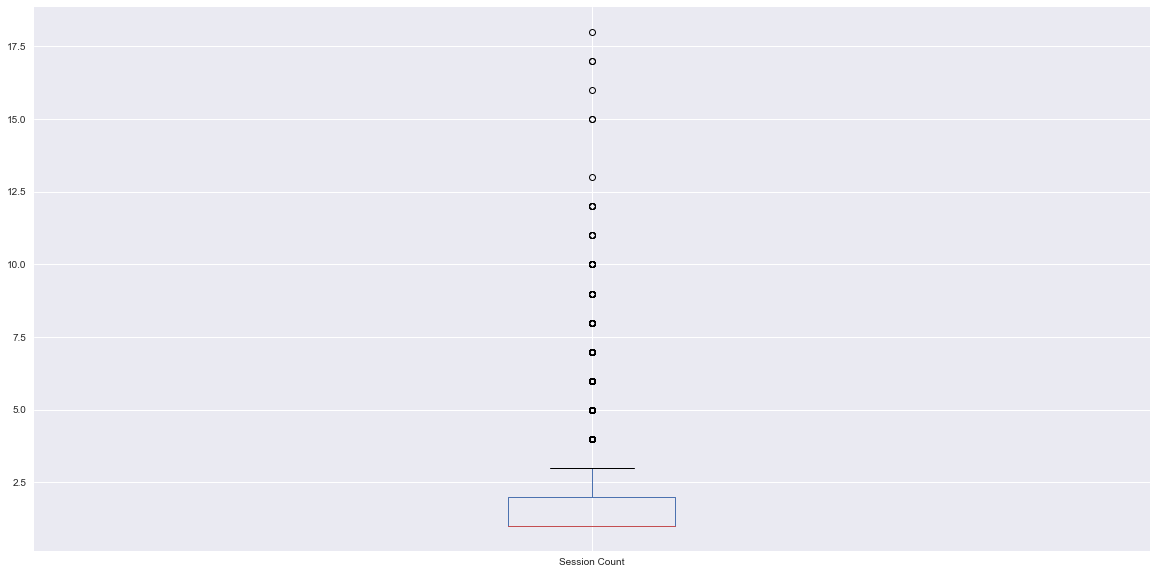

In [175]:
volume_per_user.boxplot(column=["Session Count"], figsize=(20, 10))

### Bivariate analysis
---

In [176]:
volume_per_user.corr()

,Session Count,Dur. (s),Total Data Transferred,Google Volume (Bytes),Netflix Volume (Bytes),Youtube Volume (Bytes),Gaming Volume (Bytes),Email Volume (Bytes),Social Media Volume (Bytes),Other Volume (Bytes)
Session Count,1.00,0.64,0.81,0.84,0.86,0.86,0.77,0.82,0.77,0.77
Dur. (s),0.64,1.00,0.52,0.53,0.54,0.55,0.49,0.53,0.49,0.49
Total Data Transferred,0.81,0.52,1.00,0.68,0.71,0.71,1.00,0.66,0.62,0.62
Google Volume (Bytes),0.84,0.53,0.68,1.00,0.72,0.72,0.64,0.69,0.64,0.64
Netflix Volume (Bytes),0.86,0.54,0.71,0.72,1.00,0.74,0.66,0.71,0.66,0.66
Youtube Volume (Bytes),0.86,0.55,0.71,0.72,0.74,1.00,0.66,0.71,0.66,0.66
Gaming Volume (Bytes),0.77,0.49,1.00,0.64,0.66,0.66,1.00,0.63,0.59,0.59
Email Volume (Bytes),0.82,0.53,0.66,0.69,0.71,0.71,0.63,1.00,0.63,0.63
Social Media Volume (Bytes),0.77,0.49,0.62,0.64,0.66,0.66,0.59,0.63,1.00,0.59
Other Volume (Bytes),0.77,0.49,0.62,0.64,0.66,0.66,0.59,0.63,0.59,1.00


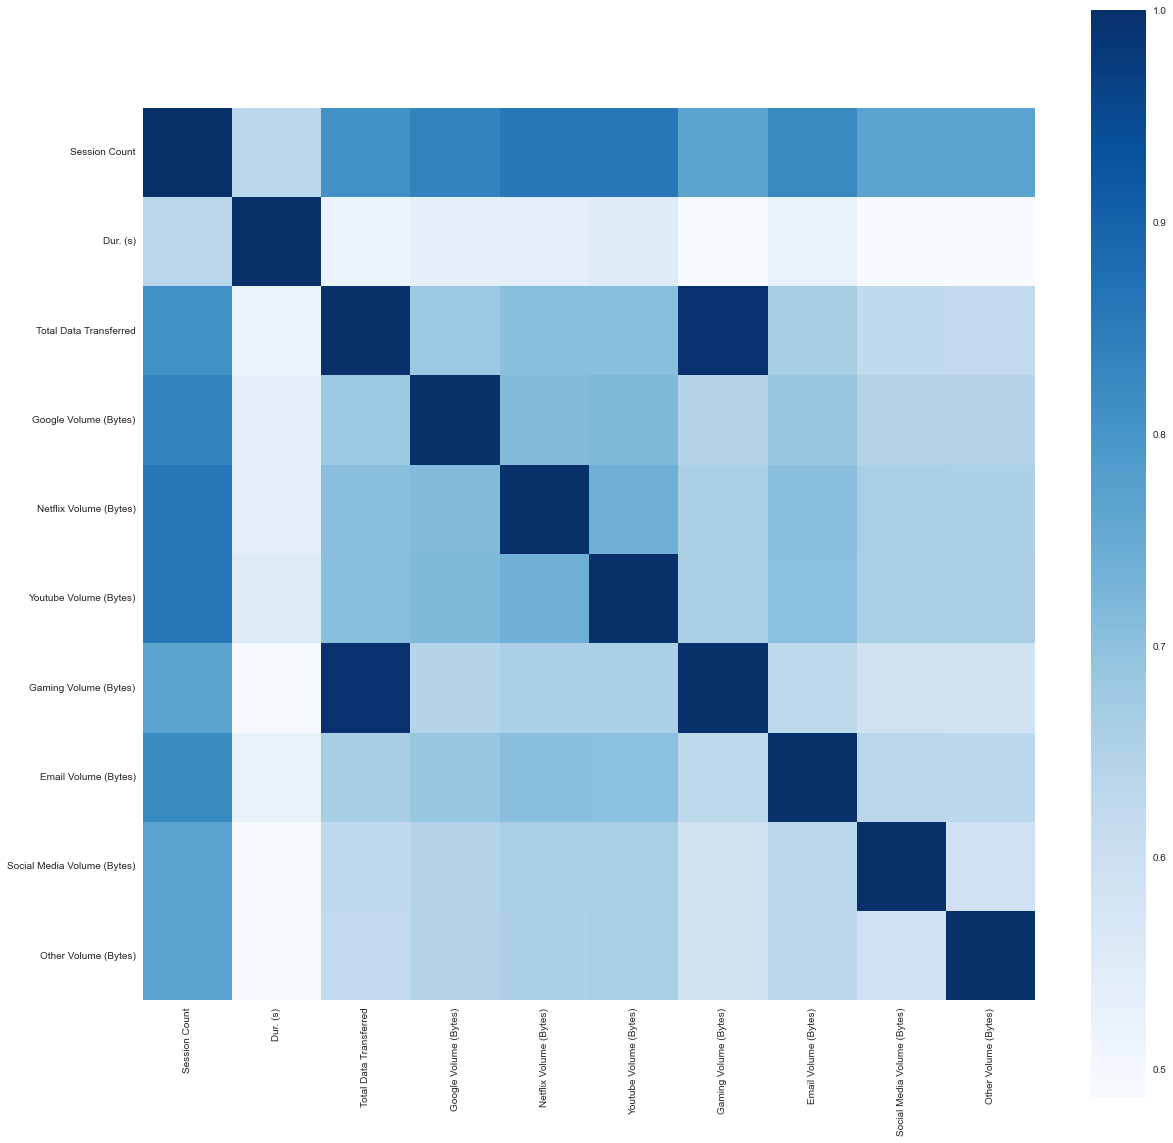

In [177]:
fig, ax = plt.subplots(figsize=(20, 20))
ax = sns.heatmap(volume_per_user.corr(), cmap="Blues", square=True)

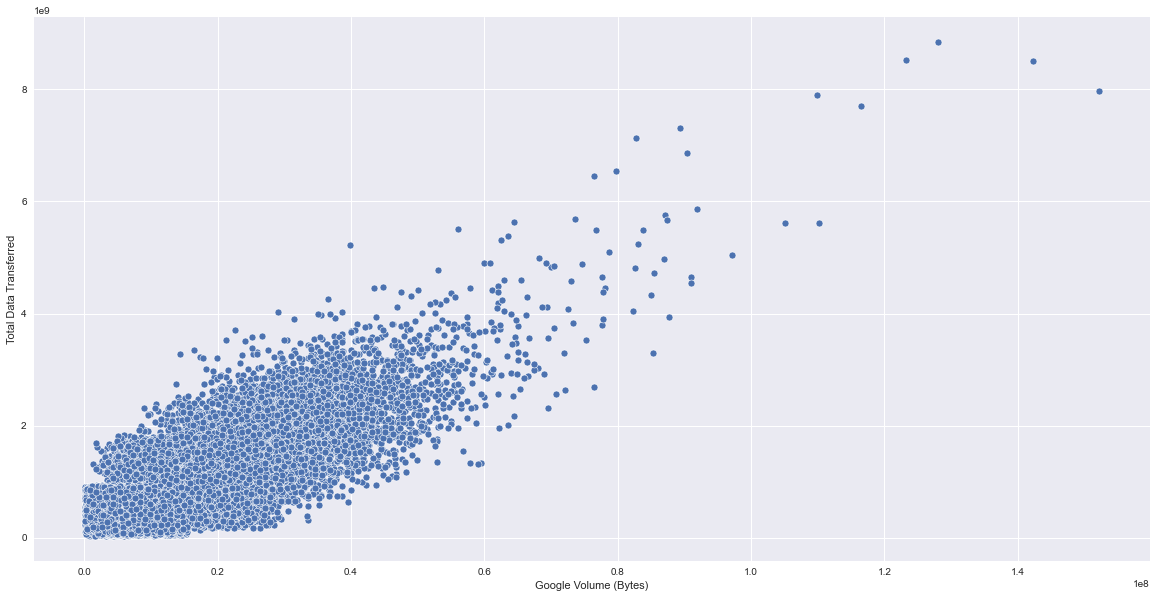

In [178]:
fig, ax = plt.subplots(figsize=(20, 10))
ax = sns.scatterplot(x= volume_per_user["Google Volume (Bytes)"], y= volume_per_user["Total Data Transferred"])

In [179]:
bivariate = volume_per_user.drop(columns=["MSISDN/Number", "Session Count", "Dur. (s)"])

In [180]:
bivariate.head()

,Total Data Transferred,Google Volume (Bytes),Netflix Volume (Bytes),Youtube Volume (Bytes),Gaming Volume (Bytes),Email Volume (Bytes),Social Media Volume (Bytes),Other Volume (Bytes)
0,878690574.00,4389005.00,27180981.00,21624548.00,812458661.00,1331362.00,2232135.00,386570872.00
1,156859643.00,5334863.00,11221763.00,12432223.00,119750078.00,3307781.00,2660565.00,281710071.00
2,595966483.00,3443126.00,19353900.00,21333570.00,538827713.00,3205380.00,3195623.00,501693672.00
3,422320698.00,9678493.00,1942092.00,6977321.00,391126127.00,2284670.00,280294.00,35279702.00
4,1457410944.00,18499616.00,49201724.00,41533002.00,1314797820.00,3305469.00,2912542.00,804804484.00


<AxesSubplot:xlabel='Netflix Volume (Bytes)', ylabel='Total Data Transferred'>

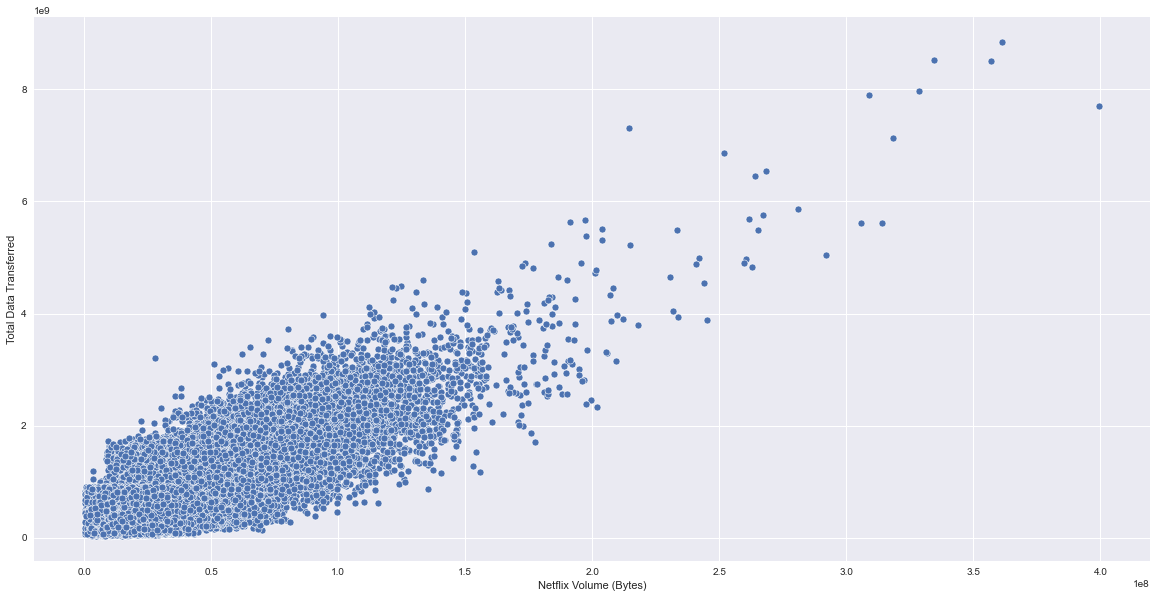

In [181]:
fig, ax = plt.subplots(figsize=(20, 10))

sns.scatterplot(x= bivariate["Netflix Volume (Bytes)"], y= bivariate["Total Data Transferred"], ax=ax)

### Decile Rank
---

In [182]:
volume_per_user["Decile Rank"] = pd.qcut(volume_per_user["Dur. (s)"], 10, labels=False)
volume_per_user.head()

,MSISDN/Number,Session Count,Dur. (s),Total Data Transferred,Google Volume (Bytes),Netflix Volume (Bytes),Youtube Volume (Bytes),Gaming Volume (Bytes),Email Volume (Bytes),Social Media Volume (Bytes),Other Volume (Bytes),Decile Rank
0,33601001722.0,1,116720.00,878690574.00,4389005.00,27180981.00,21624548.00,812458661.00,1331362.00,2232135.00,386570872.00,5
1,33601001754.0,1,181230.00,156859643.00,5334863.00,11221763.00,12432223.00,119750078.00,3307781.00,2660565.00,281710071.00,7
2,33601002511.0,1,134969.00,595966483.00,3443126.00,19353900.00,21333570.00,538827713.00,3205380.00,3195623.00,501693672.00,6
3,33601007832.0,1,49878.00,422320698.00,9678493.00,1942092.00,6977321.00,391126127.00,2284670.00,280294.00,35279702.00,1
4,33601008617.0,2,37104.00,1457410944.00,18499616.00,49201724.00,41533002.00,1314797820.00,3305469.00,2912542.00,804804484.00,1


### PCA Analysis
---

In [225]:
from sklearn.decomposition import PCA

In [226]:
pca = PCA(n_components=2)

In [227]:
pca.fit(volume_per_user)

PCA(n_components=2)

In [233]:
pca.components_

array([[ 1.00000000e+00, -5.40945119e-16,  7.58189376e-10,
        -5.83903344e-07, -2.05529566e-09, -2.95176432e-09,
         1.11355149e-08, -5.86613380e-07,  2.35531727e-10,
        -1.76521405e-09, -3.65735577e-07, -9.47750185e-07,
         5.80508463e-15],
       [ 1.30247408e-06,  6.32980834e-10,  9.31144083e-05,
         4.15745988e-01,  4.97690280e-03,  1.44272953e-02,
         1.44710562e-02,  3.74027866e-01,  1.43254389e-03,
         1.15508486e-03,  3.43645042e-01,  7.54135791e-01,
         1.08629881e-09]])